<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/7d/Copper_Price_History_USD.png" width="600px" height="400px" />

# Descarga y manipulación de históricos de precios

*Objetivos:*
- Aprender a importar datos desde archivos separados por comas (extensión `.csv`).
- Descargar el paquete `pandas-datareader`.
- Aprender a descargar datos desde fuentes remotas.

**Referencias:**
- http://pandas.pydata.org/
- https://pandas-datareader.readthedocs.io/en/latest/
___

## 1. Importar datos desde archivos locales

<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/8/86/Microsoft_Excel_2013_logo.svg" width="300px" height="125px" />

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="125px" />

### 1.1. ¿Porqué?

- Muchas veces tenemos bases de datos proporcionadas como archivos locales.
- Para poder analizar, procesar y tomar decisiones con estos datos, es necesario importarlos a python.
- Ejemplos de archivos donde comúnmente se guardan bases de datos son: 
 - `.xls` o `.xlsx`
 -  `.cvs`
- Excel es ampliamente usado en distintos campos de aplicación en todo el mundo.
- Nos guste o no, esto también aplica a ciencia de datos (ingeniería financiera).
- Muchos de ustedes en su futuro académico y profesional tendrán que trabajar con estas hojas de cálculo, pero no siempre querrán trabajar directamente con ellas si tienen que hacer un análisis un poco más avanzado de los datos.
- Por eso en Python se han implementado herramientas para leer, escribir y manipular este tipo de archivos.

En esta clase veremos cómo podemos trabajar con Excel y Python de manera básica utilizando la librería *pandas*.

### 1.2. Reglas básicas para antes de leer hojas de cálculo

Antes de comenzar a leer una hoja de cálculo en Python (o cualquier otro programa), debemos considerar el ajustar nuestro archivo para cumplir ciertos principios, como:

- La primer fila de la hoja de cálculo se reserva para los títulos, mientras que la primer columna se usa para identificar la unidad de muestreo o indización de los datos (tiempo, fecha, eventos...)
- Evitar nombres, valores o campos con espacios en blanco. De otra manera, cada palabra se interpreta como variable separada y resultan errores relacionados con el número de elementos por línea.
- Los nombres cortos se prefieren sobre nombre largos.
- Evite símbolos como ?, $, %, ^, &, *, (,),-,#, ?, ,,<,>, /, |, \, [ ,] , {, y }.
- Borre cualquier tipo de comentario que haya hecho en su archivo para evitar columnas extras.
- Asegúrese de que cualquier valor inexistente esté indicado como NA.

Si se hizo algún cambio, estar seguro de guardarlo. 

Si estás trabajando con Microsoft Excel, verás que hay muchas opciones para guardar archivos, a parte de las extensiones por defecto .xls or .xlsx. Para esto ir a “Save As” y seleccionar una de las extensiones listadas en “Save as Type”. 

La extensión más común es .csv (archivos de texto separados por comas).

**Actividad.** Descargar precios de acciones de Apple (AAPL) de Yahoo Finance, con una ventana de tiempo desde el 01-01-2015 al 31-12-2017 y frecuencia diaria.

- Ir a https://finance.yahoo.com/.
- Buscar cada una de las compañías solicitadas.
- Dar click en la pestaña *'Historical Data'*.
- Cambiar las fechas en *'Time Period'*, click en *'Apply'* y, finalmente, click en *'Download Data'*.
- **¡POR FAVOR! GUARDAR ESTOS ARCHIVOS EN UNA CARPETA LLAMADA precios EN EL MISMO DIRECTORIO DONDE TIENEN ESTE ARCHIVO**.

### 1.3. Carguemos archivos .csv como ventanas de datos de pandas

Ahora podemos comenzar a importar nuestros archivos.

Una de las formas más comunes de trabajar con análisis de datos es en pandas. Esto es debido a que pandas está construido sobre NumPy y provee estructuras de datos y herramientas de análisis fáciles de usar.

In [172]:
import numpy as np
import datetime
import scipy.stats as stats

# Importamos pandas
import pandas as pd

#algunas opciones para Pandas
# pd.set_option('display.notebook_repr_html', False)
# pd.set_option('display.max_columns', 6)
# pd.set_option('display.max_rows', 10)
# pd.set_option('display.width', 78)
# pd.set_option('precision', 3)
pd.set_option('display.max_rows', 10)

Para leer archivos `.csv`, utilizaremos la función `read_csv` de pandas:

In [2]:
# Función read_csv
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read CSV (comma-separated) file into DataFrame
    
    Also supports optionally itera

In [5]:
# Cargamos hoja de calculo en un dataframe
file_name='precios/AAPL.csv'
aapl = pd.read_csv(file_name)
aapl

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,111.389999,111.440002,107.349998,109.330002,102.319397,53204600
1,2015-01-05,108.290001,108.650002,105.410004,106.250000,99.436890,64285500
2,2015-01-06,106.540001,107.430000,104.629997,106.260002,99.446251,65797100
3,2015-01-07,107.199997,108.199997,106.699997,107.750000,100.840714,40105900
4,2015-01-08,109.230003,112.150002,108.699997,111.889999,104.715256,59364500
...,...,...,...,...,...,...,...
750,2017-12-22,174.679993,175.419998,174.500000,175.009995,173.023026,16114600
751,2017-12-26,170.800003,171.470001,169.679993,170.570007,168.633423,33185500
752,2017-12-27,170.100006,170.779999,169.710007,170.600006,168.663101,21498200
753,2017-12-28,171.000000,171.850006,170.479996,171.080002,169.137650,16480200


#### Anotación #1
- Quisieramos indizar por fecha.

In [7]:
# Cargamos hoja de calculo en un dataframe
aapl = pd.read_csv(file_name, index_col='Date')
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,111.389999,111.440002,107.349998,109.330002,102.319397,53204600
2015-01-05,108.290001,108.650002,105.410004,106.250000,99.436890,64285500
2015-01-06,106.540001,107.430000,104.629997,106.260002,99.446251,65797100
2015-01-07,107.199997,108.199997,106.699997,107.750000,100.840714,40105900
2015-01-08,109.230003,112.150002,108.699997,111.889999,104.715256,59364500
...,...,...,...,...,...,...
2017-12-22,174.679993,175.419998,174.500000,175.009995,173.023026,16114600
2017-12-26,170.800003,171.470001,169.679993,170.570007,168.633423,33185500
2017-12-27,170.100006,170.779999,169.710007,170.600006,168.663101,21498200


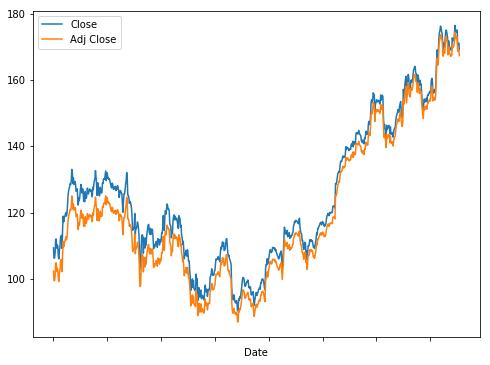

In [8]:
# Graficar precios de cierre y precios de cierre ajustados
import matplotlib.pyplot as plt
%matplotlib inline

aapl[['Close', 'Adj Close']].plot(figsize=(8,6));

#### Anotación #2
- Para nuestra aplicación solo nos interesan los precios de cierre de las acciones (columna Adj Close).

In [11]:
# Cargamos hoja de calculo en un dataframe
aapl = pd.read_csv(file_name, index_col='Date', usecols=['Date', 'Adj Close'])
aapl.columns = ['AAPL']
aapl

,AAPL
Date,
2015-01-02,102.319397
2015-01-05,99.436890
2015-01-06,99.446251
2015-01-07,100.840714
2015-01-08,104.715256
...,...
2017-12-22,173.023026
2017-12-26,168.633423
2017-12-27,168.663101


**Actividad.** Importen todos los archivos .csv como acabamos de hacerlo con el de apple. Además, crear un solo DataFrame que cuyos encabezados por columna sean los nombres respectivos (AAPL, AMZN,...) y contengan los datos de precio de cierre.

,AMZN
Date,
2015-01-02,308.519989
2015-01-05,302.190002
2015-01-06,295.290009
2015-01-07,298.420013
2015-01-08,300.459991
...,...
2017-12-22,1168.359985
2017-12-26,1176.760010
2017-12-27,1182.260010


,KO
Date,
2015-01-02,37.229038
2015-01-05,37.229038
2015-01-06,37.511745
2015-01-07,37.979980
2015-01-08,38.439381
...,...
2017-12-22,44.414360
2017-12-26,44.628693
2017-12-27,44.745594


,AAPL,AMZN,KO
Date,,,
2015-01-02,102.319397,308.519989,37.229038
2015-01-05,99.436890,302.190002,37.229038
2015-01-06,99.446251,295.290009,37.511745
2015-01-07,100.840714,298.420013,37.979980
2015-01-08,104.715256,300.459991,38.439381
...,...,...,...
2017-12-22,173.023026,1168.359985,44.414360
2017-12-26,168.633423,1176.760010,44.628693
2017-12-27,168.663101,1182.260010,44.745594


## 2. Descargar los datos remotamente
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [20]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web

El módulo data del paquete pandas_datareader contiene la funcion `DataReader`:

In [21]:
# Función DataReader
help(web.DataReader)

Help on function DataReader in module pandas_datareader.data:

DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, access_key=None)
    Imports data from a number of online sources.
    
    Currently supports Google Finance, St. Louis FED (FRED),
    and Kenneth French's data library, among others.
    
    Parameters
    ----------
    name : str or list of strs
        the name of the dataset. Some data sources (google, fred) will
        accept a list of names.
    data_source: {str, None}
        the data source ("google", "fred", "ff")
    start : {datetime, None}
        left boundary for range (defaults to 1/1/2010)
    end : {datetime, None}
        right boundary for range (defaults to today)
    retry_count : {int, 3}
        Number of times to retry query request.
    pause : {numeric, 0.001}
        Time, in seconds, to pause between consecutive queries of chunks. If
        single value given for symbol, represents the pause be

- A esta función le podemos especificar la fuente de los datos para que se use la api específica para la descarga de datos de cada fuente.
- Fuentes:
 - Google Finance: su api ya no sirve.
 - Quandl: solo permite descargar datos de equities estadounidenses de manera gratuita. Es la base de datos más completa. Si se desea uasar hay que crear una cuenta para autenticarse en la API.
 - IEX: los datos tienen antiguedad máxima de 5 años y de equities estadounidenses.
 - Yahoo! Finance: su api ha tenido cambios significativos y ya no es posible usarla desde DataReader. Sin embargo permite obtener datos de distintas bolsas (incluida la mexicana), por eso le haremos la luchita.

In [38]:
# Ejemplo google finance
ticker = 'AAPL'
source = 'google'
start = '2015-01-01'
end = '2017-12-31'
aapl_goo = web.DataReader(ticker, source, start, end)


ImmediateDeprecationError: 
Google finance has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


>Página oficial de `quandl` para crear cuenta y tutorial de instalación de su api
> https://docs.quandl.com/docs/python-installation

In [196]:
# Ejemplo quandl
import quandl

# quandl.ApiConfig.api_key = "My9ygJsz7yTDx_9jcneH"

ticker = ['AAPL', 'MSFT','KO']
date = { 'gte': '2016-01-01', 'lte': '2016-12-31' }
column = { 'columns': ['ticker', 'date', 'Adj_close']}

data = quandl.get_table('WIKI/PRICES', qopts = column,ticker = ticker, date = date)# ticker = 'WIKI/AAPL' #'AAPL.US'
data = data.set_index('date') # Poner los índices como las fechas

# Seleccionar los ADJ_CLOSE de ticker
data_n = [data.loc[data['ticker']== i,'adj_close'] for i in ticker]
data_n

[date
 2016-12-30    114.389454
 2016-12-29    115.288214
 2016-12-28    115.317843
 2016-12-27    115.811668
 2016-12-23    115.080808
                  ...    
 2016-01-08     93.677776
 2016-01-07     93.185040
 2016-01-06     97.291172
 2016-01-05     99.233131
 2016-01-04    101.783763
 Name: adj_close, Length: 252, dtype: float64, date
 2016-12-30    60.788710
 2016-12-29    61.532183
 2016-12-28    61.620226
 2016-12-27    61.903920
 2016-12-23    61.864790
                 ...    
 2016-01-08    49.829617
 2016-01-07    49.677262
 2016-01-06    51.467434
 2016-01-05    52.419653
 2016-01-04    52.181598
 Name: adj_close, Length: 252, dtype: float64, date
 2016-12-30    40.438769
 2016-12-29    40.575321
 2016-12-28    40.370493
 2016-12-27    40.585074
 2016-12-23    40.575321
                 ...    
 2016-01-08    39.206398
 2016-01-07    39.310293
 2016-01-06    39.971447
 2016-01-05    40.188683
 2016-01-04    40.047007
 Name: adj_close, Length: 252, dtype: float64]

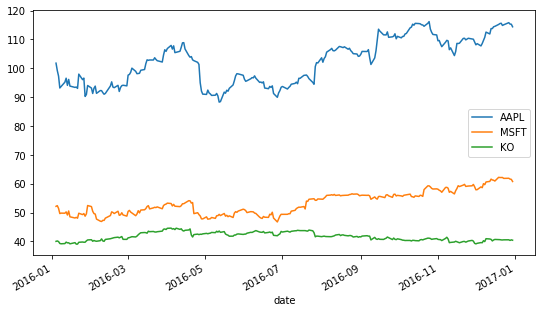

In [198]:
# Gráfica de precios
list(map(lambda i:data_n[i].plot(figsize=(9,5)),range(len(ticker))))
# data_n[0].column = ticker[0]
plt.legend(ticker)

In [39]:
# Ejemplo iex
ticker = ['AAPL', 'NVDA']
source = 'iex'
start = '2015-01-01'
end = '2017-12-31'
aapl_iex = web.DataReader(ticker, source, start, end)
aapl_iex

Attributes      open                high                 low            \
Symbols         AAPL      NVDA      AAPL      NVDA      AAPL      NVDA   
date                                                                     
2015-01-02  104.2471   19.5029  104.2939   19.6483  100.4662   19.1939   
2015-01-05  101.3459   19.5029  101.6828   19.5611   98.6506   19.0863   
2015-01-06   99.7082   19.2026  100.5411   19.2220   97.9206   18.5728   
2015-01-07  100.3258   18.7279  101.2617   18.8926   99.8532   18.4856   
2015-01-08  102.2257   18.7569  104.9584   19.3576  101.7296   18.7472   
...              ...       ...       ...       ...       ...       ...   
2017-12-22  172.6967  194.0530  173.4323  195.3008  172.5188  190.9086   
2017-12-26  168.8608  192.6855  169.5232  197.3970  167.7525  191.4776   
2017-12-27  168.1687  196.5485  168.8410  199.6131  167.7831  195.9596   
2017-12-28  169.0585  197.7764  169.8988  199.0241  168.5444  196.7995   
2017-12-29  168.5839  198.1058  168.6531  198.1058  167.2987  193.1546   

Attributes     close              volume            
Symbols         AAPL      NVDA      AAPL      NVDA  
date                                                
2015-01-02  102.3192   19.5029  53204626   2842012  
2015-01-05   99.4367   19.1735  64285491   4948799  
2015-01-06   99.4461   18.5922  65797116   4944121  
2015-01-07  100.8406   18.5389  40105934   8045186  
2015-01-08  104.7151   19.2413  59364547   7094534  
...              ...       ...       ...       ...  
2017-12-22  173.0230  194.9215  16349444  11656871  
2017-12-26  168.6334  197.0876  33185536   8877033  
2017-12-27  168.6630  196.8181  21498213   8237223  
2017-12-28  169.1376  197.0477  16480187   6006248  
2017-12-29  167.3086  193.1546  25999922   6999116  

[755 rows x 10 columns]

### Uso de Pandas para bajar datos de Yahoo! Finance
Intentamos con la función YahooDailyReader

In [166]:
help(web.YahooDailyReader)

Help on class YahooDailyReader in module pandas_datareader.yahoo.daily:

class YahooDailyReader(pandas_datareader.base._DailyBaseReader)
 |  Returns DataFrame of with historical over date range,
 |  start to end.
 |  To avoid being penalized by Yahoo! Finance servers, pauses between
 |  downloading 'chunks' of symbols can be specified.
 |  
 |  Parameters
 |  ----------
 |  symbols : string, array-like object (list, tuple, Series), or DataFrame
 |      Single stock symbol (ticker), array-like object of symbols or
 |      DataFrame with index containing stock symbols.
 |  start : string, (defaults to '1/1/2010')
 |      Starting date, timestamp. Parses many different kind of date
 |      representations (e.g., 'JAN-01-2010', '1/1/10', 'Jan, 1, 1980')
 |  end : string, (defaults to today)
 |      Ending date, timestamp. Same format as starting date.
 |  retry_count : int, default 3
 |      Number of times to retry query request.
 |  pause : int, default 0.1
 |      Time, in seconds, to p

In [167]:
# YahooDailyReader
ticker = 'AEROMEX.MX'
start = '2015-01-01'
end = '2017-12-31'
aapl_yah = web.YahooDailyReader(ticker, start, end, interval='d').read()
aapl_yah

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,20.600000,19.200001,20.600000,19.389999,452156,19.389999
2015-01-05,20.590000,19.170000,19.700001,20.030001,467183,20.030001
2015-01-06,20.200001,19.270000,20.200001,19.570000,301361,19.570000
2015-01-07,19.950001,19.370001,19.670000,19.430000,222100,19.430000
2015-01-08,21.400000,19.430000,19.430000,20.840000,289943,20.840000
...,...,...,...,...,...,...
2017-12-22,30.299999,30.160000,30.250000,30.209999,208893,30.209999
2017-12-26,30.000000,29.820000,30.000000,29.879999,126312,29.879999
2017-12-27,30.000000,29.590000,29.860001,29.770000,330661,29.770000


Sin embargo no se pueden descargar varios a la vez. Intentémoslo hacer nosotros así sea de manera rudimentaria:

In [168]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [248]:
# Ejemplo: 'AAPL', 'MSFT', 'NVDA', '^GSPC'
ticker = ['AAPL', 'MSFT', 'NVDA', '^GSPC']
start = '2015-01-01'
end = '2017-12-31'
closes = get_closes(tickers=ticker, start_date=start, end_date=end, freq='d')
closes

,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-02,102.319397,42.783936,19.503389,2058.199951
2015-01-05,99.436890,42.390499,19.173971,2020.579956
2015-01-06,99.446251,41.768314,18.592646,2002.609985
2015-01-07,100.840714,42.299000,18.544207,2025.900024
2015-01-08,104.715256,43.543350,19.241789,2062.139893
...,...,...,...,...
2017-12-22,173.023026,84.418022,194.921509,2683.340088
2017-12-26,168.633423,84.309425,197.087631,2680.500000
2017-12-27,168.663101,84.615471,196.818115,2682.620117


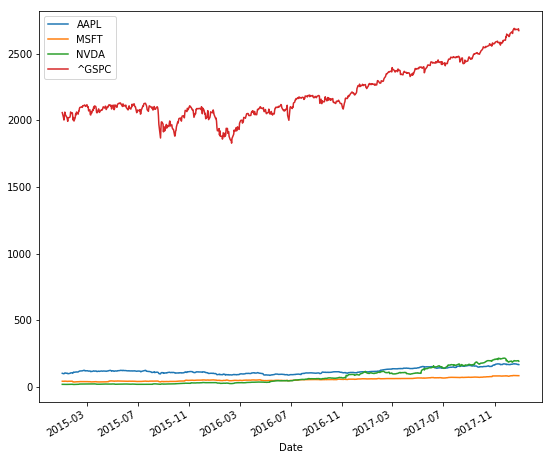

In [252]:
# Gráfica de datos
closes.plot(figsize=(9,8))

**Nota**: Para descargar datos de la bolsa mexicana de valores (BMV), el ticker debe tener la extensión MX. 
Por ejemplo: *MEXCHEM.MX*, *LABB.MX*, *GFINBURO.MX* y *GFNORTEO.MX*.

Como se puede notar, en este caso se consideran tres activos 
- Alcoa: AA
- Apple: AAPL
- Microsoft: MSFT

y, el índice 

- Standard & Poor's: 500S&P500.

Todos almacenados en la variable *closes*.

El objeto *assets* tiene la característica *items*. Con estos, se pueden verificar los registros almacenados

In [173]:
closes.items

<bound method DataFrame.iteritems of                   AAPL       MSFT        NVDA        ^GSPC
Date                                                      
2015-01-02  102.319397  42.783936   19.503389  2058.199951
2015-01-05   99.436890  42.390499   19.173971  2020.579956
2015-01-06   99.446251  41.768314   18.592646  2002.609985
2015-01-07  100.840714  42.299000   18.544207  2025.900024
2015-01-08  104.715256  43.543350   19.241789  2062.139893
...                ...        ...         ...          ...
2017-12-22  173.023026  84.418022  194.921509  2683.340088
2017-12-26  168.633423  84.309425  197.087631  2680.500000
2017-12-27  168.663101  84.615471  196.818115  2682.620117
2017-12-28  169.137650  84.625343  197.047684  2687.540039
2017-12-29  167.308640  84.447639  193.154648  2673.610107

[755 rows x 4 columns]>

Acceder a alguna posición específica de la variable *closes*

In [176]:
closes.iloc[0,0]

102.31939697265625

In [179]:
closes.loc['2015-01-02','AAPL']

102.31939697265625

Si deseamos encontrar los precios de cierre en una fecha específica usamos *2015-08-14*

In [181]:
closes.loc['2015-07-02','AAPL']

119.29548645019531

O, finalmente, los valores del S&P500

In [254]:
closes['^GSPC']
# assets.minor_xs('^GSPC')
# assets.loc['Adj Close']

Date
2015-01-02    2058.199951
2015-01-05    2020.579956
2015-01-06    2002.609985
2015-01-07    2025.900024
2015-01-08    2062.139893
                 ...     
2017-12-22    2683.340088
2017-12-26    2680.500000
2017-12-27    2682.620117
2017-12-28    2687.540039
2017-12-29    2673.610107
Name: ^GSPC, Length: 755, dtype: float64

### Actividad
Obtener datos históricos de
- GRUPO CARSO, S.A.B. DE C.V.
- GRUPO FINANCIERO INBURSA, S.A.B. DE C.V.
- GRUPO FINANCIERO BANORTE, S.A.B DE C.V.
- GRUPO AEROMÉXICO, S.A.B. DE C.V.

en el año 2014.

1. ¿Qué compañía reportó precios de cierre más altos en *2014-07-14*?
2. Obtener los precios de cierre de cada compañía en todo el año.
3. Comparar, para cada compañía, los precios de cierre entre *2014-01-02* y *2014-12-31*.

In [190]:
ticker_mx = ['GCARSOA1.MX', 'GFINBURO.MX', 'GFNORTEO.MX', 'AEROMEX.MX']

start = '2014-01-02'
end = '2014-12-31'
assets_mx = get_closes(tickers=ticker_mx, start_date=start, end_date=end, freq='d')
assets_mx

,GCARSOA1.MX,GFINBURO.MX,GFNORTEO.MX,AEROMEX.MX
Date,,,,
2014-01-02,64.990173,33.647175,81.259628,18.049999
2014-01-03,65.347626,33.216282,82.033279,18.090000
2014-01-06,63.296986,32.317024,80.574898,18.469999
2014-01-07,62.807854,33.394257,80.868370,19.459999
2014-01-08,62.337517,32.495007,80.112511,18.990000
...,...,...,...,...
2014-12-24,69.862328,35.229111,72.167374,19.639999
2014-12-26,70.879929,35.579502,72.131462,19.629999
2014-12-29,71.241325,36.270828,72.840660,19.520000


In [191]:
assets_mx_20140714 = assets_mx.loc['2014-07-14']
assets_mx_20140714

GCARSOA1.MX    68.784119
GFINBURO.MX    36.753811
GFNORTEO.MX    81.500282
AEROMEX.MX     22.070000
Name: 2014-07-14 00:00:00, dtype: float64

In [192]:
assets_mx_20140714.idxmax(), assets_mx_20140714.max()

('GFNORTEO.MX', 81.50028228759766)

In [193]:
assets_mx_20140714.pop(assets_mx_20140714.idxmax())

81.50028228759766

In [194]:
assets_mx.iloc[[0, -1]]

,GCARSOA1.MX,GFINBURO.MX,GFNORTEO.MX,AEROMEX.MX
Date,,,,
2014-01-02,64.990173,33.647175,81.259628,18.049999
2014-12-31,69.034935,36.062489,72.894516,20.440001


In [195]:
assets_mx.iloc[[0, -1]].diff().iloc[1:]
# 20.44-18.05

,GCARSOA1.MX,GFINBURO.MX,GFNORTEO.MX,AEROMEX.MX
Date,,,,
2014-12-31,4.044762,2.415314,-8.365112,2.390001


# 2. Graficos de las series de datos

En primer lugar, se toma como ejemplo la serie de precios `AEROMEX.MX`, así como el volumen de transacciones.

In [207]:
ticker = 'AEROMEX.MX'
start = '2015-01-01'
end = '2017-12-31'
aero_mx = web.YahooDailyReader(ticker, start, end, interval='d').read()
# Se extraen los precios de cierre y los volúmenes de transacción
clos_aero_mx = aero_mx['Adj Close']
# clos_aero_mx
vol_aero_mx = aero_mx['Volume']
vol_aero_mx
# vol_aero_mx.shape,clos_aero_mx.shape

Date
2015-01-02    452156
2015-01-05    467183
2015-01-06    301361
2015-01-07    222100
2015-01-08    289943
               ...  
2017-12-22    208893
2017-12-26    126312
2017-12-27    330661
2017-12-28    225042
2017-12-29    732755
Name: Volume, Length: 754, dtype: int64

El gráfico de esta serie se obtiene de forma simple mediante el siguiente comando

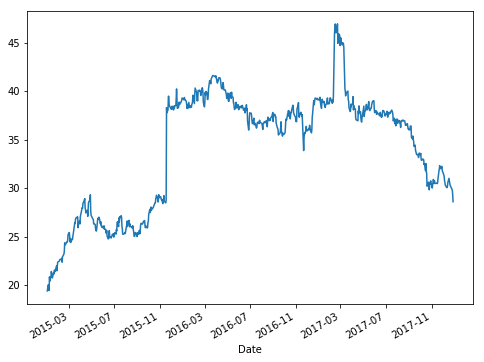

In [209]:
clos_aero_mx.plot(figsize=(8,6))

De forma similar, se grafica la serie de volúmenes de transacción

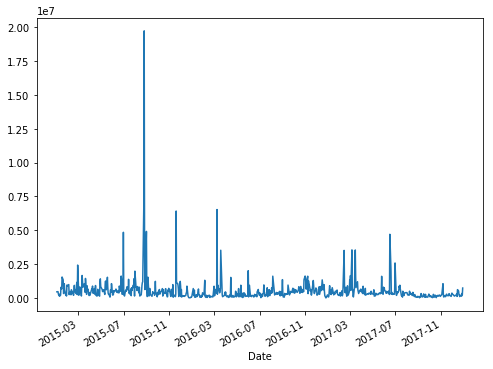

In [210]:
vol_aero_mx.plot(figsize=(8,6));

Usualmente, es conveniente graficar al precio de cierre de una acción en conjunto con su volumen de transacciones. El siguiente es un ejemplo de esta clase de graficas para el caso de Aeroméxico.

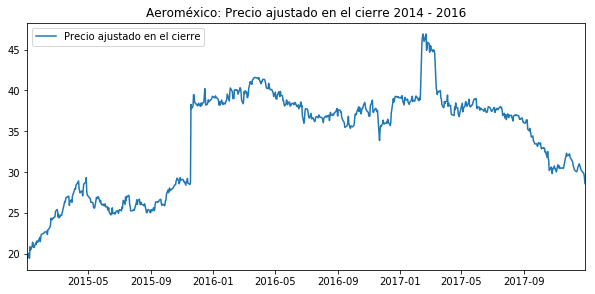

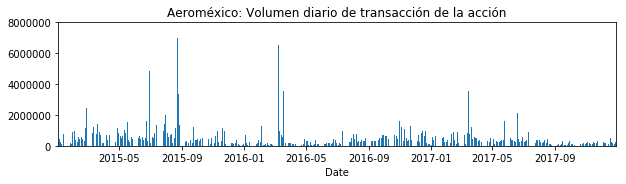

In [215]:
# top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
# top.plot(msftAC.index, msftAC, label='Precio ajustado en el cierre')
# plt.title('Microsoft: Precio ajustado en el cierre 2014 - 2016')
# plt.legend(loc='best')
# bottom = plt.subplot2grid((4,4), (3, 0), rowspan=1, colspan=4)
# bottom.bar(msftV.index, msftV)
# plt.title('Microsoft: Volumen diario de transacción de la acción')
# plt.gcf().set_size_inches(12,8)
# plt.subplots_adjust(hspace=0.75)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(clos_aero_mx.index, clos_aero_mx, label='Precio ajustado en el cierre')
plt.title('Aeroméxico: Precio ajustado en el cierre 2014 - 2016')
plt.legend(loc='best')
plt.xlim([clos_aero_mx.index[0],clos_aero_mx.index[-1]])
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(2,1,2)
plt.bar(vol_aero_mx.index, vol_aero_mx)
plt.title('Aeroméxico: Volumen diario de transacción de la acción')
plt.xlabel('Date')
plt.xlim([vol_aero_mx.index[0],vol_aero_mx.index[-1]])
plt.ylim([0,.8e7])
plt.show()

Otro procedimiento que se efectúa con frecuencia, es el cálculo de promedios y desviaciones móviles para la serie de precios. Los promedios móviles se calculan mediante:

In [231]:
short_rollmean_AM_AC = clos_aero_mx.rolling(window=20).mean()
long_rollmean_AM_AC = clos_aero_mx.rolling(window=100).mean()
short_rollmean_AM_AC

Date
2015-01-02        NaN
2015-01-05        NaN
2015-01-06        NaN
2015-01-07        NaN
2015-01-08        NaN
               ...   
2017-12-22    30.9975
2017-12-26    30.8920
2017-12-27    30.7785
2017-12-28    30.6360
2017-12-29    30.4540
Name: Adj Close, Length: 754, dtype: float64

Grafiquemos los precios junto con las medias móviles que acabamos de calcular

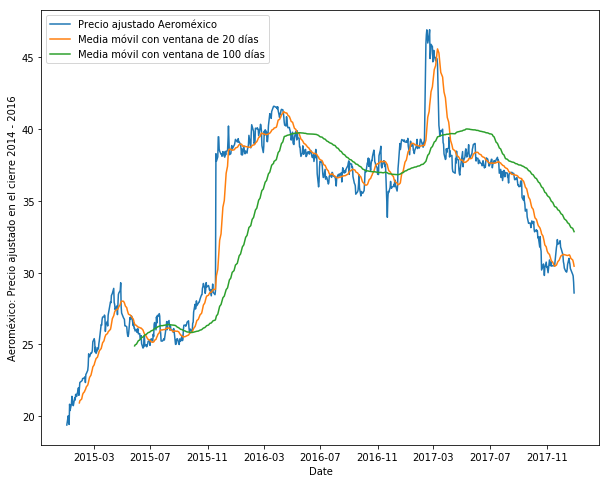

In [238]:
# %matplotlib notebook
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.plot(clos_aero_mx.index, clos_aero_mx, label='Precio ajustado Aeroméxico')
ax.plot(short_rollmean_AM_AC.index, short_rollmean_AM_AC, label='Media móvil con ventana de 20 días')
ax.plot(long_rollmean_AM_AC.index, long_rollmean_AM_AC, label='Media móvil con ventana de 100 días')
ax.set_xlabel('Date')
ax.set_ylabel('Aeroméxico: Precio ajustado en el cierre 2014 - 2016')
ax.legend(loc='best');

Las desviaciones estándar móviles se calculan con

In [241]:
short_rollstd_AM_AC = clos_aero_mx.rolling(window=20).std()
long_rollstd_AM_AC = clos_aero_mx.rolling(window=100).std()

y los gráficos...

In [236]:
clos_aero_mx

Date
2015-01-02    19.389999
2015-01-05    20.030001
2015-01-06    19.570000
2015-01-07    19.430000
2015-01-08    20.840000
                ...    
2017-12-22    30.209999
2017-12-26    29.879999
2017-12-27    29.770000
2017-12-28    29.330000
2017-12-29    28.590000
Name: Adj Close, Length: 754, dtype: float64

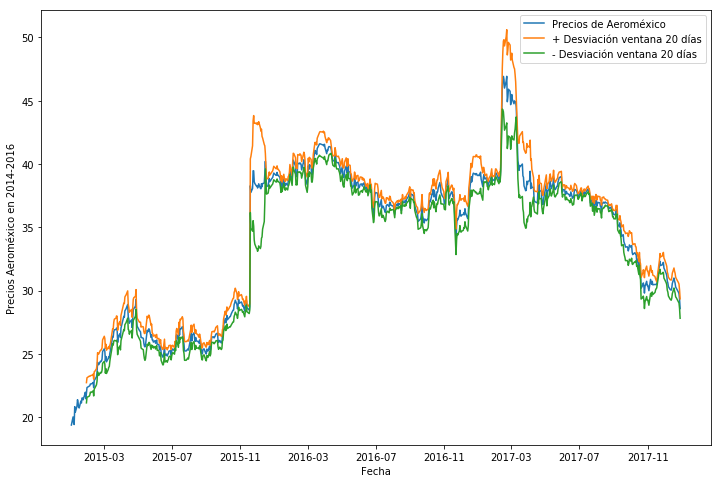

In [242]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(clos_aero_mx.index, clos_aero_mx, label = 'Precios de Aeroméxico')
ax.plot(clos_aero_mx.index, clos_aero_mx+short_rollstd_AM_AC, label = '+ Desviación ventana 20 días')
ax.plot(clos_aero_mx.index, clos_aero_mx-short_rollstd_AM_AC, label = '- Desviación ventana 20 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precios Aeroméxico en 2014-2016')
ax.legend(loc='best')

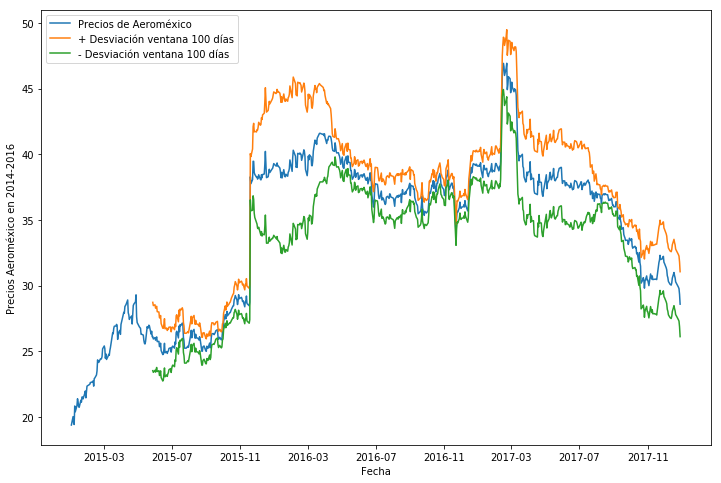

In [244]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(clos_aero_mx.index, clos_aero_mx, label = 'Precios de Aeroméxico')
ax.plot(clos_aero_mx.index, clos_aero_mx+long_rollstd_AM_AC, label = '+ Desviación ventana 100 días')
ax.plot(clos_aero_mx.index, clos_aero_mx-long_rollstd_AM_AC, label = '- Desviación ventana 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precios Aeroméxico en 2014-2016')
ax.legend(loc='best')

Podemos graficar los precios de las acciones americanas

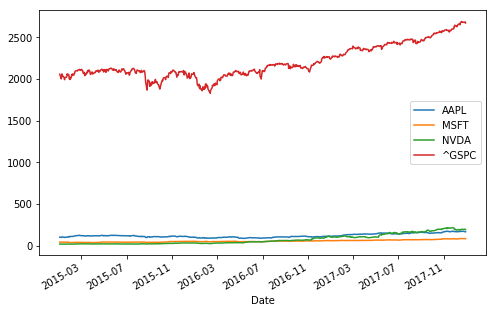

In [260]:
closes.plot(figsize=(8,5))

Sin embargo, vemos que los precios de cierre del índice S&P500 están muy por encima de los precios de cierre de los activos, lo cual dificulta la visualización. Entonces, obtenemos el gráfico de solo los activos

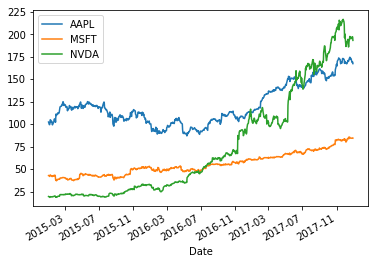

In [269]:
closes[['AAPL','MSFT','NVDA']].plot()

## 3. Cálculo de los rendimientos

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, la fórmula anterior se puede implementar para todos los precios de cierre de manera simultánea mediante

In [88]:
allAC

                AA     AAPL    MSFT    ^GSPC
Date                                        
2014-01-02  24.486   67.984  33.365  1831.98
2014-01-03  24.579   66.491  33.141  1831.37
2014-01-06  24.486   66.853  32.441  1826.77
2014-01-07  24.509   66.375  32.692  1837.88
2014-01-08  25.183   66.795  32.108  1837.49
...            ...      ...     ...      ...
2016-12-23  29.710  114.210  61.570  2263.79
2016-12-27  29.650  114.936  61.608  2268.88
2016-12-28  29.430  114.446  61.326  2249.92
2016-12-29  28.890  114.416  61.239  2249.26
2016-12-30  28.080  113.524  60.499  2238.83

[756 rows x 4 columns]

In [41]:
allAC.shift(1)

                AA     AAPL    MSFT    ^GSPC
Date                                        
2014-01-02     NaN      NaN     NaN      NaN
2014-01-03  24.486   68.261  33.522  1831.98
2014-01-06  24.579   66.762  33.297  1831.37
2014-01-07  24.486   67.126  32.593  1826.77
2014-01-08  24.509   66.646  32.846  1837.88
...            ...      ...     ...      ...
2016-12-23  29.750  114.450  62.162  2260.96
2016-12-27  29.710  114.676  61.859  2263.79
2016-12-28  29.650  115.404  61.898  2268.88
2016-12-29  29.430  114.912  61.614  2249.92
2016-12-30  28.890  114.883  61.526  2249.26

[756 rows x 4 columns]

In [63]:
Rall = ((allAC-allAC.shift(1))/allAC.shift(1)).iloc[1:]
Rall

                   AA       AAPL       MSFT      ^GSPC
Date                                                  
2014-01-03  3.799e-03 -2.197e-02 -6.728e-03 -3.330e-04
2014-01-06 -3.784e-03  5.453e-03 -2.113e-02 -2.512e-03
2014-01-07  9.497e-04 -7.152e-03  7.750e-03  6.082e-03
2014-01-08  2.751e-02  6.333e-03 -1.785e-02 -2.122e-04
2014-01-09 -1.293e-02 -1.277e-02 -6.431e-03  3.483e-04
...               ...        ...        ...        ...
2016-12-23 -1.345e-03  1.978e-03 -4.878e-03  1.252e-03
2016-12-27 -2.019e-03  6.351e-03  6.323e-04  2.248e-03
2016-12-28 -7.420e-03 -4.264e-03 -4.583e-03 -8.357e-03
2016-12-29 -1.835e-02 -2.570e-04 -1.429e-03 -2.933e-04
2016-12-30 -2.804e-02 -7.796e-03 -1.208e-02 -4.637e-03

[755 rows x 4 columns]

Ya está implementada la fórmula para obtener cambios porcentuales

In [64]:
Rall1 = allAC.pct_change(1).iloc[1:]
Rall1

                   AA       AAPL       MSFT      ^GSPC
Date                                                  
2014-01-03  3.799e-03 -2.197e-02 -6.728e-03 -3.330e-04
2014-01-06 -3.784e-03  5.453e-03 -2.113e-02 -2.512e-03
2014-01-07  9.497e-04 -7.152e-03  7.750e-03  6.082e-03
2014-01-08  2.751e-02  6.333e-03 -1.785e-02 -2.122e-04
2014-01-09 -1.293e-02 -1.277e-02 -6.431e-03  3.483e-04
...               ...        ...        ...        ...
2016-12-23 -1.345e-03  1.978e-03 -4.878e-03  1.252e-03
2016-12-27 -2.019e-03  6.351e-03  6.323e-04  2.248e-03
2016-12-28 -7.420e-03 -4.264e-03 -4.583e-03 -8.357e-03
2016-12-29 -1.835e-02 -2.570e-04 -1.429e-03 -2.933e-04
2016-12-30 -2.804e-02 -7.796e-03 -1.208e-02 -4.637e-03

[755 rows x 4 columns]

y la gráfica de los mismos se puede obtener como

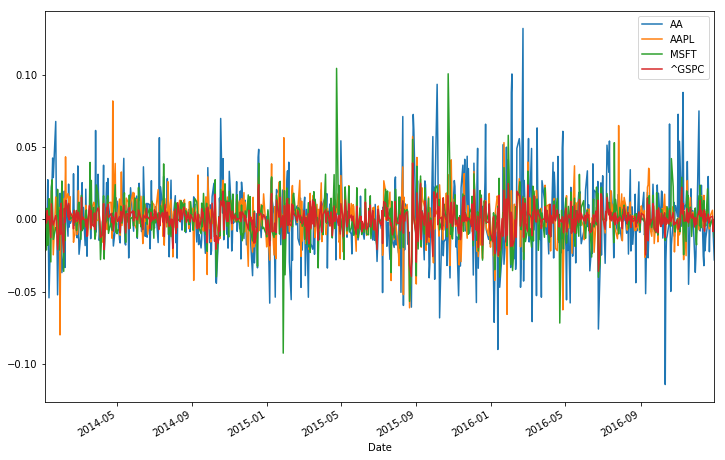

In [65]:
Rall.plot(figsize=(12,8));

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python.

In [92]:
rall = np.log(allAC/allAC.shift(1)).iloc[1:]

In [93]:
rall

                   AA       AAPL       MSFT      ^GSPC
Date                                                  
2014-01-03  3.791e-03 -2.221e-02 -6.750e-03 -3.330e-04
2014-01-06 -3.791e-03  5.438e-03 -2.136e-02 -2.515e-03
2014-01-07  9.492e-04 -7.177e-03  7.720e-03  6.063e-03
2014-01-08  2.714e-02  6.313e-03 -1.801e-02 -2.122e-04
2014-01-09 -1.301e-02 -1.285e-02 -6.452e-03  3.482e-04
...               ...        ...        ...        ...
2016-12-23 -1.345e-03  1.976e-03 -4.890e-03  1.251e-03
2016-12-27 -2.022e-03  6.331e-03  6.321e-04  2.246e-03
2016-12-28 -7.448e-03 -4.273e-03 -4.593e-03 -8.392e-03
2016-12-29 -1.852e-02 -2.570e-04 -1.430e-03 -2.933e-04
2016-12-30 -2.844e-02 -7.826e-03 -1.216e-02 -4.648e-03

[755 rows x 4 columns]

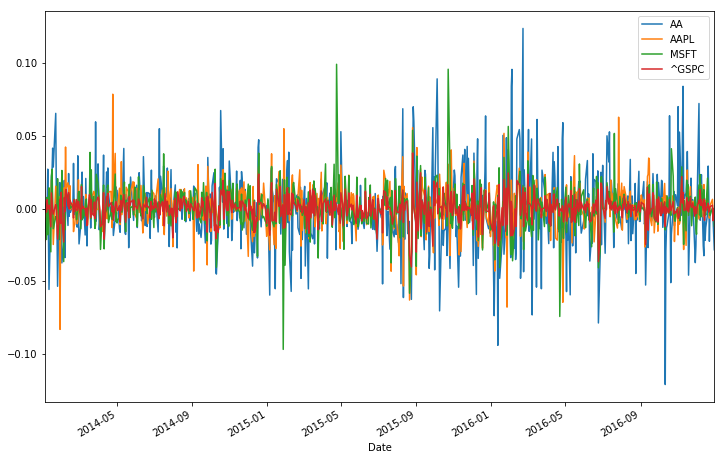

In [94]:
rall.plot(figsize=(12,8));

Notar que, en efecto, las diferencias entre $R_t$ y $r_t$ son muy pequeñas...

In [95]:
np.abs(rall-Rall)

                   AA       AAPL       MSFT      ^GSPC
Date                                                  
2014-01-03  7.196e-06  2.448e-04  2.273e-05  5.545e-08
2014-01-06  7.178e-06  1.481e-05  2.265e-04  3.160e-06
2014-01-07  4.506e-07  2.570e-05  2.987e-05  1.842e-05
2014-01-08  3.717e-04  1.997e-05  1.613e-04  2.252e-08
2014-01-09  8.428e-05  8.224e-05  2.077e-05  6.065e-08
...               ...        ...        ...        ...
2016-12-23  9.047e-07  1.953e-06  1.194e-05  7.827e-07
2016-12-27  2.042e-06  2.008e-05  1.998e-07  2.524e-06
2016-12-28  2.766e-05  9.117e-06  1.053e-05  3.511e-05
2016-12-29  1.704e-04  3.303e-08  1.022e-06  4.302e-08
2016-12-30  4.006e-04  3.055e-05  7.359e-05  1.078e-05

[755 rows x 4 columns]

Escribamos funciones que devuelva los rendimientos diarios (simples y continuamente compuestos), dado un DataFrame de precios...

In [49]:
#rendimientos diarios simples
def simple_daily_ret(closes):
    return closes.pct_change(1).iloc[1:]

def log_dailiy_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

## ¿Porqué es más usado los rendimientos logarítmicos?

1. **log-normalidad**: si asumimos que los precios se distribuyen log-normalmente, entonces $log( 1 + r_i )$ se distribuye normalmente, lo cual es muy útil ya que muchos teoremas se supone normalidad.
2. Característica más importante es que son **aditivos en el tiempo.**  El producto de variables normalmente distribuidas no es una variable normal. Sin embargo la suma de variables normales no correlacionadas, sí que vuelve a ser una variable normal.
3. la **estabilidad numérica;** la adición de pequeñas cantidades es numéricamente fuerte, mientras que la multiplicación de números pequeños está sujeta a desbordamiento aritmético.

## 4. Gráficos útiles de los rendimientos

Tomemos como ejemplo la serie de precios de cierre de Microsoft y veamos (al menos gráficamente) si los rendimientos si son un proceso estocástico estacionario...

In [47]:
msftAC

Date
2014-01-02    33.365
2014-01-03    33.141
2014-01-06    32.441
2014-01-07    32.692
2014-01-08    32.108
               ...  
2016-12-23    61.570
2016-12-27    61.608
2016-12-28    61.326
2016-12-29    61.239
2016-12-30    60.499
Name: MSFT, dtype: float64

In [60]:
Rmsft = simple_daily_ret(msftAC)

In [59]:
short_rollmean_Rmsft = Rmsft.rolling(window=20).mean()
long_rollmean_Rmsft = Rmsft.rolling(window=100).mean()
short_rollstd_Rmsft = Rmsft.rolling(window=20).std()
long_rollstd_Rmsft = Rmsft.rolling(window=100).std()

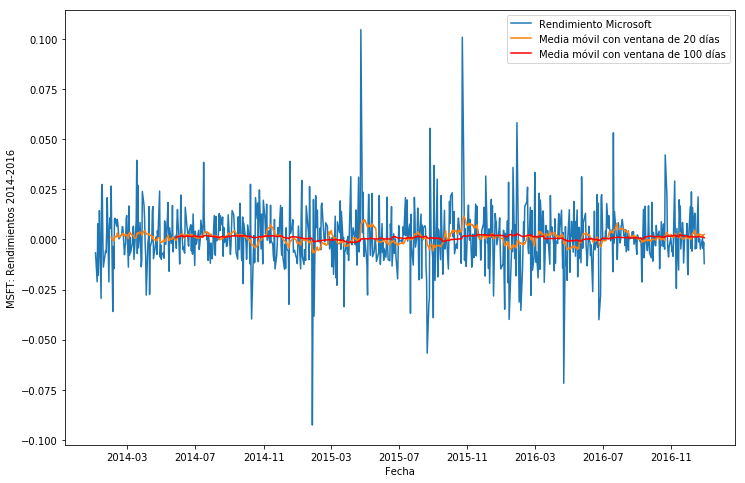

In [58]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(short_rollmean_Rmsft.index, short_rollmean_Rmsft, label = 'Media móvil con ventana de 20 días')
ax.plot(long_rollmean_Rmsft.index, long_rollmean_Rmsft, 'r', label = 'Media móvil con ventana de 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2014-2016')
ax.legend(loc='best');

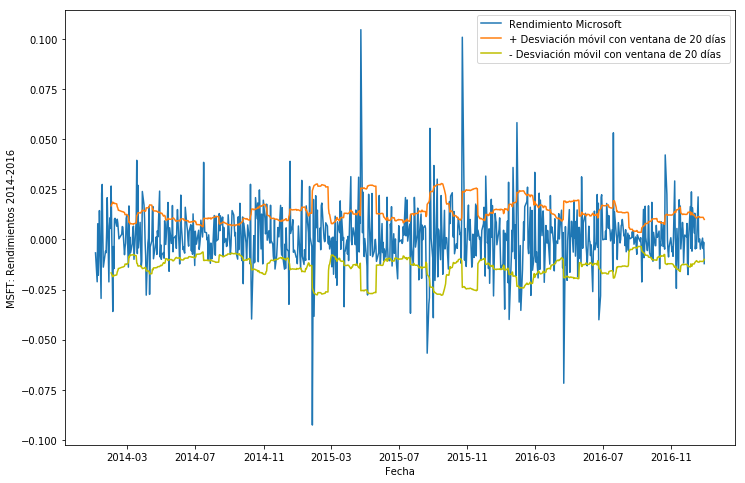

In [61]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(short_rollstd_Rmsft.index, short_rollstd_Rmsft, label = '+ Desviación móvil con ventana de 20 días')
ax.plot(short_rollstd_Rmsft.index, -short_rollstd_Rmsft, 'y', label = '- Desviación móvil con ventana de 20 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2014-2016')
ax.legend(loc='best');

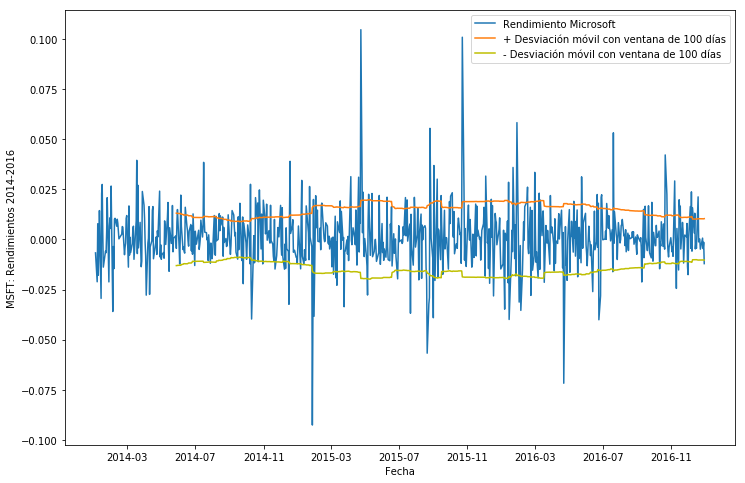

In [103]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(long_rollstd_Rmsft.index, long_rollstd_Rmsft, label = '+ Desviación móvil con ventana de 100 días')
ax.plot(long_rollstd_Rmsft.index, -long_rollstd_Rmsft, 'y', label = '- Desviación móvil con ventana de 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2014-2016')
ax.legend(loc='best');

No es estacionario...

Justificar simulación.

Se puede verificar también con un gráfico cuantil-cuantil (qq plot)

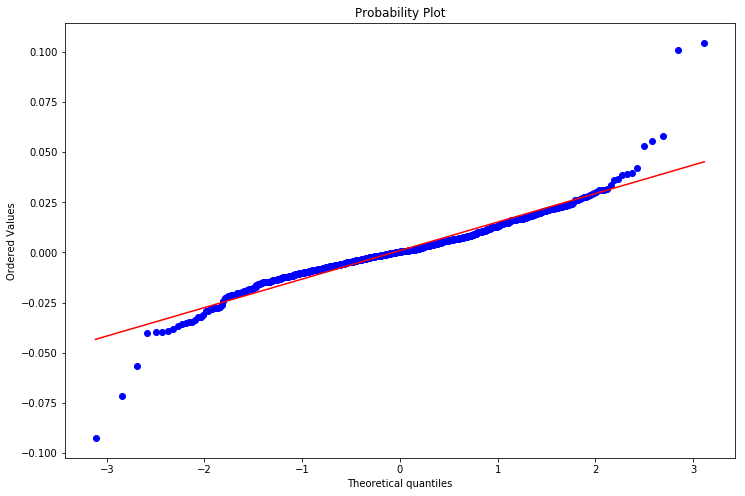

In [104]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
stats.probplot(Rmsft, dist='norm', plot=ax);

Una más, con la librería seaborn...

In [56]:
import seaborn as sns

instalar librería con el comando `conda install -c anaconda seaborn`

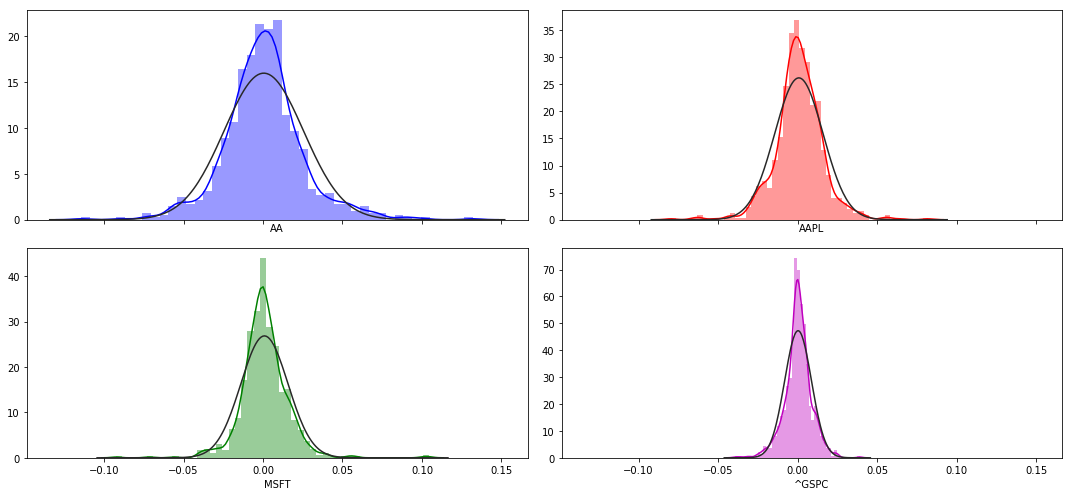

In [66]:
f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=True)
# Plot a simple histogram with binsize determined automatically
sns.distplot(Rall.loc[:,'AA'], color="b", fit=stats.norm, norm_hist=True, ax=axes[0, 0])
sns.distplot(Rall.loc[:,'AAPL'], color="r", fit=stats.norm, norm_hist=True, ax=axes[0, 1])
sns.distplot(Rall.loc[:,'MSFT'], color="g", fit=stats.norm, norm_hist=True, ax=axes[1, 0])
sns.distplot(Rall.loc[:,'^GSPC'], color="m", fit=stats.norm, norm_hist=True, ax=axes[1, 1])
plt.tight_layout()

## 5. Gráficos de correlación

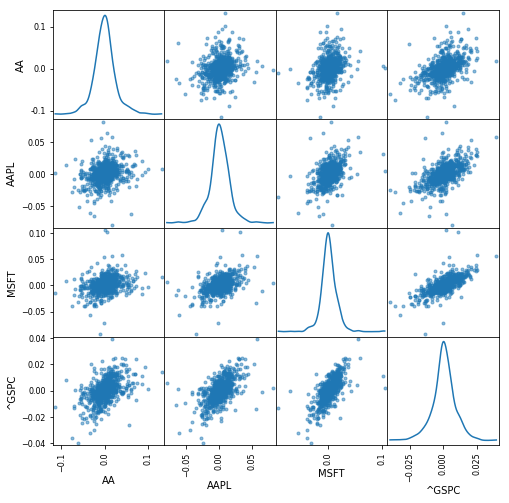

In [67]:
import pandas.tools.plotting as cor
cor.scatter_matrix(Rall, diagonal='kde', alpha=0.5, figsize=(8,8));
# pd.tools.plotting.scatter_matrix(Rall, diagonal='kde', alpha=0.5, figsize=(8,8));

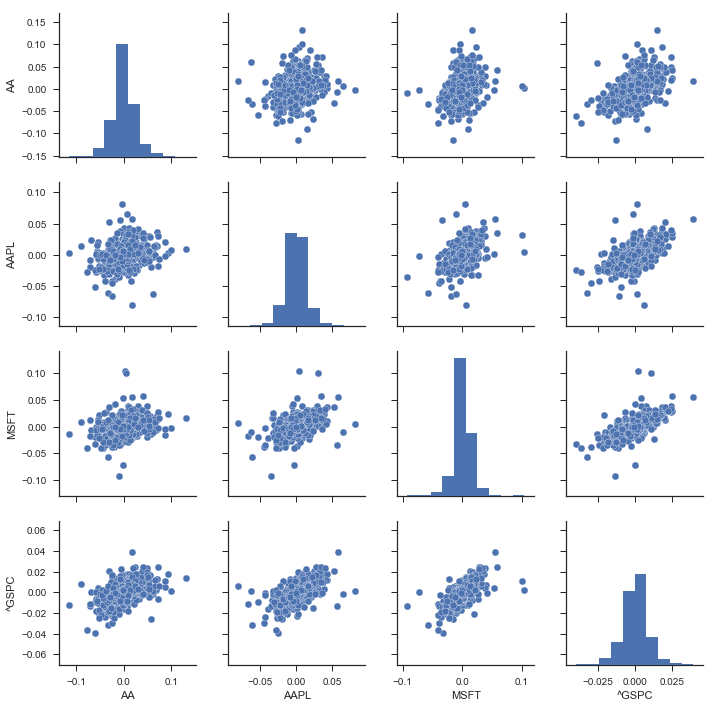

In [68]:
sns.set(style="ticks")
sns.pairplot(Rall);

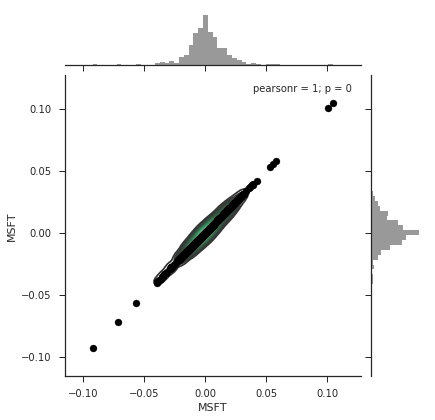

In [62]:
sns.jointplot("MSFT", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

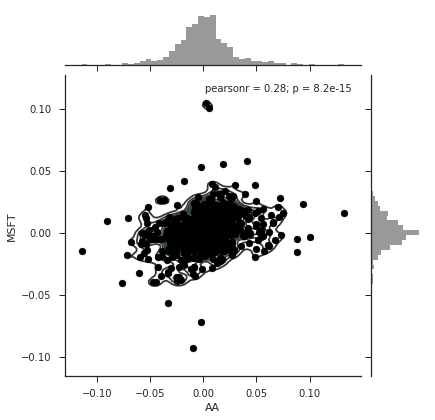

In [63]:
sns.jointplot("AA", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

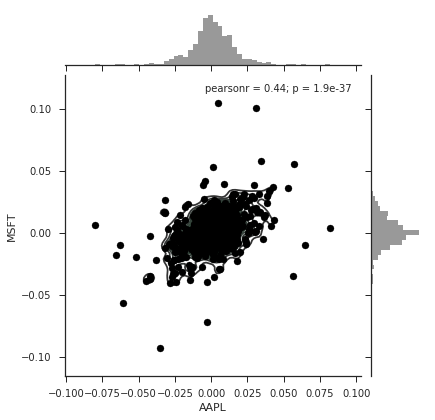

In [64]:
sns.jointplot("AAPL", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

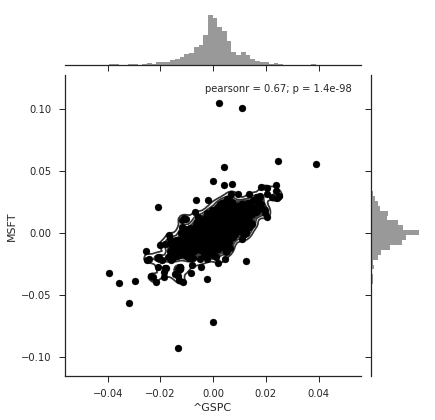

In [65]:
sns.jointplot("^GSPC", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

In [117]:
Rall.corr()

          AA   AAPL   MSFT  ^GSPC
AA     1.000  0.247  0.277  0.491
AAPL   0.247  1.000  0.442  0.575
MSFT   0.277  0.442  1.000  0.668
^GSPC  0.491  0.575  0.668  1.000

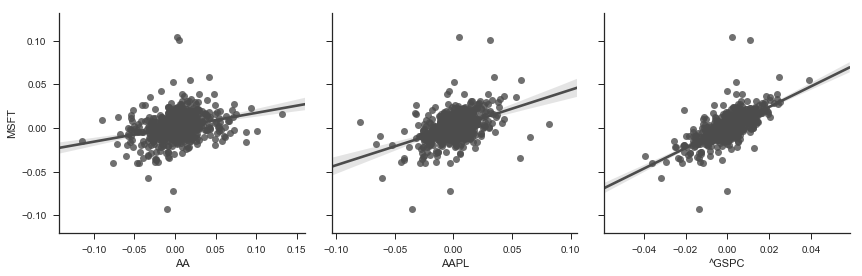

In [118]:
g = sns.PairGrid(Rall, y_vars=["MSFT"], x_vars=["AA", "AAPL", "^GSPC"], size=4)
g.map(sns.regplot, color=".3");

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez and modify by Oscar Jaramillo Z.
</footer>